In [1]:
import math
import torch
import numpy as np
import gpytorch
import pandas as pd
import seaborn as sns
import os
import pickle
import matplotlib 
matplotlib.use('Agg')
from matplotlib import pyplot as plt
import sklearn
from sklearn.model_selection import KFold

%matplotlib inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import imblearn as imb
# print("imblearn version: ",imblearn.__version__)
from imblearn.over_sampling import SMOTE

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
import itertools

from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, auc, recall_score

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from rdkit import Chem
from rdkit.Chem import Draw
import sys
sys.path.append('../../')
# import utils
from sklearn.model_selection import GridSearchCV
from VisUtils import *
from split_data import *
from RF_GSCV import *

from imblearn.under_sampling import RandomUnderSampler

# Load inhibition data 

In [28]:
# update Mar 27 moved directories 

In [2]:
split_path = '../../../../../data/NEK_data_4Berkeley/NEK2/inhib'
# train_x_df = pd.read_csv(split_path+"/NEK2_inhibition_random_fold1_trainX.csv")
# train_y_df= pd.read_csv(split_path+"/NEK2_inhibition_random_fold1_trainY.csv")
# test_x_df= pd.read_csv(split_path+"/NEK2_inhibition_random_fold1_testX.csv")
# test_y_df= pd.read_csv(split_path+"/NEK2_inhibition_random_fold1_testY.csv")
train_x_df = pd.read_csv(split_path+"/inhib_train_x_UNDER.csv")
train_y_df= pd.read_csv(split_path+"/inhib_train_y_UNDER.csv")
test_x_df= pd.read_csv(split_path+"/inhib_test_x_UNDER.csv")
test_y_df= pd.read_csv(split_path+"/inhib_test_y_UNDER.csv")

train_x = train_x_df.to_numpy()
train_y = train_y_df.to_numpy().reshape(-1)
test_x = test_x_df.to_numpy()
test_y = test_y_df.to_numpy().reshape(-1)
train_x.shape, train_y.shape, test_x.shape, test_y.shape

((223, 306), (223,), (408, 306), (408,))

In [3]:
# #test samples not selected 
# trainXdf = pd.read_csv(split_path+'/inhib_train_x_normalized.csv')
# trainydf = pd.read_csv(split_path+"/inhib_train_y_normalized.csv")
# testXdf = pd.read_csv(split_path+"/inhib_test_x_normalized.csv")
# testydf = pd.read_csv(split_path+"/inhib_test_y_normalized.csv")
# trainX = trainXdf.to_numpy()

# trainytemp = trainydf.to_numpy().reshape(-1)
# trainXtemp = trainXdf.to_numpy()
# testXtemp= testXdf.to_numpy()
# testYtemp = testydf.to_numpy().reshape(-1)


# from imblearn.under_sampling import RandomUnderSampler  

# UNDER =RandomUnderSampler()
# trainX, trainy = UNDER.fit_resample(trainXtemp, trainytemp)
# testX = testXtemp
# testy = testYtemp
# trainX.shape, trainy.shape, testX.shape, testy.shape

# selected_indices = UNDER.sample_indices_

# remaining_indices = np.setdiff1d(np.arange(len(trainX)), selected_indices)

# X_remaining = trainX[remaining_indices]
# y_remaining = trainy[remaining_indices]

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


TRAIN: accuracy: 0.924, precision: 0.873, recall: 0.990,  specificity: 0.858
TEST: accuracy: 0.806, precision: 0.226, recall: 0.750, specificity: 0.811


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<Figure size 600x400 with 0 Axes>

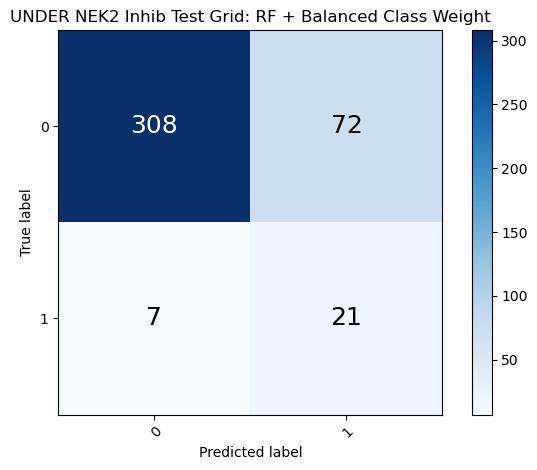

In [37]:
save_file2 = 'atom_nek2inhibUNDER_rf_basicBCW_best.pkl'
with open('../saved_models/'+save_file2, 'rb') as f: 
    rf_basicBCWbestUNDER2 = pickle.load(f) 

# gridrfbcwesults2 = rf_results2(rf_basicBCWbestUNDER2,trainX, trainy, testX, testy)
# plot_confusion_matrix(test_y, gridrfbcwesults2['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test Grid: RF + Balanced Class Weight')
gridrfbcwesults2 = rf_results2(rf_basicBCWbestUNDER2,X_remaining, y_remaining, testX, testy)
plot_confusion_matrix(test_y, gridrfbcwesults2['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test Grid: RF + Balanced Class Weight')




# Undersample 

In [21]:
# # Scale data
# x_df = pd.concat([train_x_df, test_x_df])

# scaling=StandardScaler()
 
# # Use fit and transform method 
# scaling.fit(x_df)
# Scaled_data=scaling.transform(x_df)
# train_x = scaling.transform(train_x_df)
# test_x = scaling.transform(test_x_df) 

# undersample = RandomUnderSampler()
# train_x_temp, train_y_temp = undersample.fit_resample(train_x, train_y_df)
# train_x = train_x_temp
# train_y = train_y_temp.to_numpy().flatten()
# test_y = test_y_df.to_numpy().flatten()


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.681, precision: 0.119, recall: 0.571, specificity: 0.689


<Figure size 600x400 with 0 Axes>

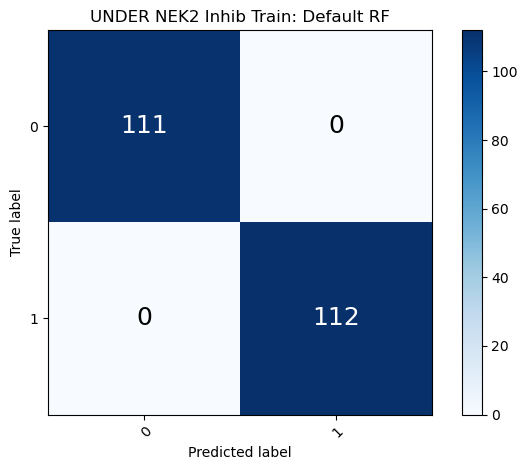

<Figure size 600x400 with 0 Axes>

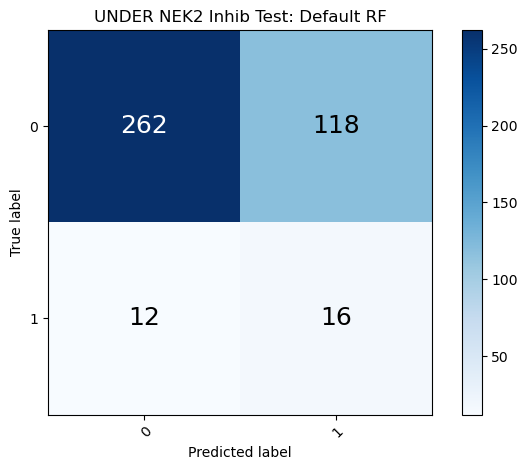

In [4]:
rf_basic100estUNDER = rf_models(train_x, train_y, test_x, test_y, 'basic RF', {}, )
plot_confusion_matrix(train_y, rf_basic100estUNDER['train_pred'], ['0','1'], title='UNDER NEK2 Inhib Train: Default RF')
plot_confusion_matrix(test_y, rf_basic100estUNDER['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test: Default RF')

# Reduced param grid for grid search - RUN IN BASH SCRIPT 

In [5]:
param_grid = {
    'n_estimators': np.linspace(100, 2000, 3, dtype = int),
    'max_depth': [20, 100, 200, 220],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [2, 5],
    'criterion': ['gini','entropy']
}

In [6]:
save_file = 'atom_nek2inhibUNDER_rf_basic_best.pkl'
# rf_basicbestUNDER = find_best_models(train_x, train_y, test_x, test_y, 'basic RF', {}, param_grid, 2)

TRAIN: accuracy: 0.883, precision: 0.816, recall: 0.991,  specificity: 0.775
TEST: accuracy: 0.811, precision: 0.231, recall: 0.750, specificity: 0.816


/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


<Figure size 600x400 with 0 Axes>

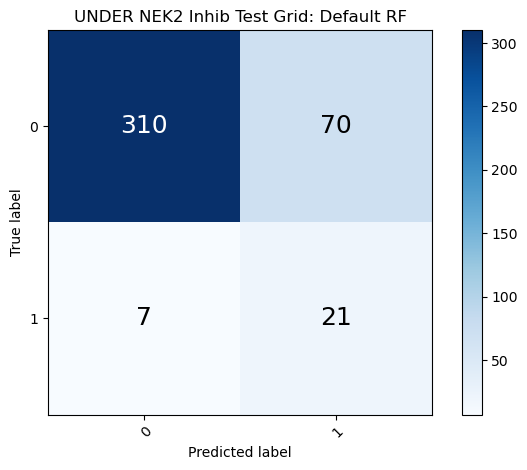

In [7]:
# with open(save_file, 'wb') as f:
#         pickle.dump(rf_basicbestUNDER['best_model'], f)
with open('../saved_models/'+save_file, 'rb') as f: 
    rf_basicbestUNDER = pickle.load(f) 
gridbasicresults = rf_results2(rf_basicbestUNDER, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridbasicresults['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test Grid: Default RF')



# Basic RF + classweight balanced 

TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.672, precision: 0.116, recall: 0.571, specificity: 0.679


<Figure size 600x400 with 0 Axes>

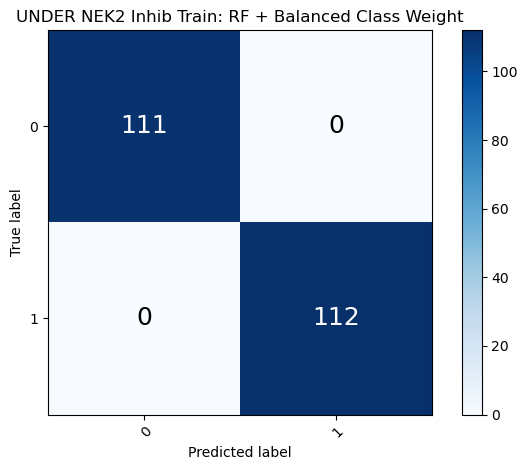

<Figure size 600x400 with 0 Axes>

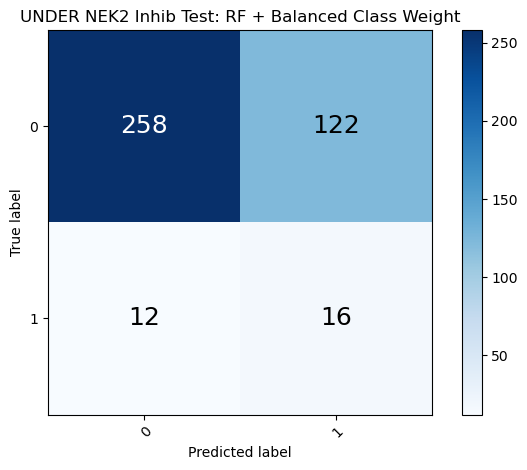

In [8]:
brf_model_BCW_UNDER = rf_models(train_x, train_y, test_x, test_y, 'balanced class_weight', {})
plot_confusion_matrix(train_y,brf_model_BCW_UNDER['train_pred'], ['0','1'], title='UNDER NEK2 Inhib Train: RF + Balanced Class Weight')
plot_confusion_matrix(test_y, brf_model_BCW_UNDER['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test: RF + Balanced Class Weight')

In [9]:
save_file2 = 'atom_nek2inhibUNDER_rf_basicBCW_best.pkl'
# rf_basicBCWbestUNDER = find_best_models(train_x, train_y, test_x, test_y, 'balanced class_weight', {}, param_grid, 2)



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/sklearn/base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.4.0 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


TRAIN: accuracy: 0.879, precision: 0.810, recall: 0.991,  specificity: 0.766
TEST: accuracy: 0.806, precision: 0.226, recall: 0.750, specificity: 0.811


<Figure size 600x400 with 0 Axes>

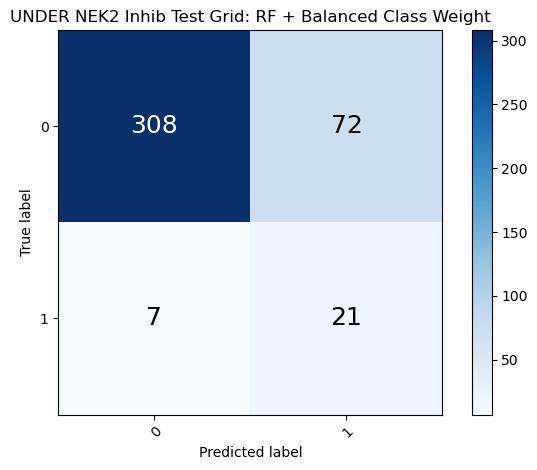

In [10]:
# with open(save_file2, 'wb') as f:
#     pickle.dump(rf_basicBCWbestUNDER['best_model'], f)
save_file2 = 'atom_nek2inhibUNDER_rf_basicBCW_best.pkl'
with open('../saved_models/'+save_file2, 'rb') as f: 
    rf_basicBCWbestUNDER = pickle.load(f) 

gridrfbcwesults = rf_results2(rf_basicBCWbestUNDER, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridrfbcwesults['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test Grid: RF + Balanced Class Weight')



# Balanced Random Forest Classifier

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.711, precision: 0.131, recall: 0.571, specificity: 0.721


<Figure size 600x400 with 0 Axes>

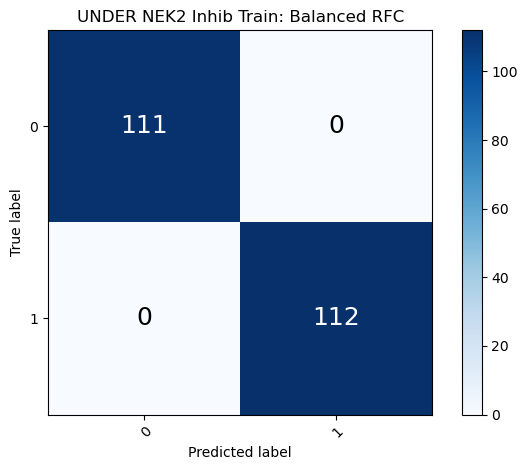

<Figure size 600x400 with 0 Axes>

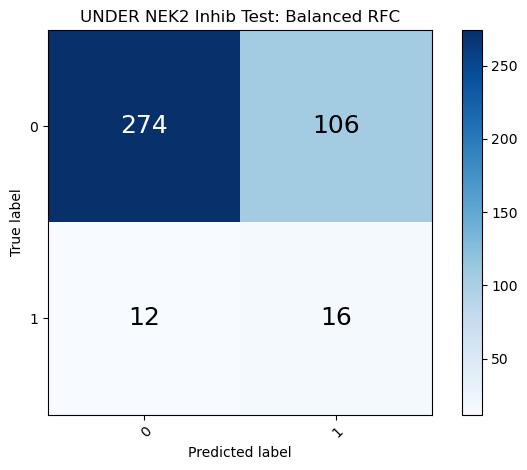

In [11]:
brf_modelUNDER = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {})
plot_confusion_matrix(train_y, brf_modelUNDER['train_pred'], ['0','1'], title='UNDER NEK2 Inhib Train: Balanced RFC')
plot_confusion_matrix(test_y, brf_modelUNDER['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test: Balanced RFC')

In [13]:
save_file3 = 'atom_nek2inhibUNDER_BRFC_best.pkl'
# brfc_bestUNDER = find_best_models(train_x, train_y, test_x, test_y, 'balanced RF', {}, param_grid, 2)



TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000,  specificity: 1.000
TEST: accuracy: 0.775, precision: 0.136, recall: 0.429, specificity: 0.800


<Figure size 600x400 with 0 Axes>

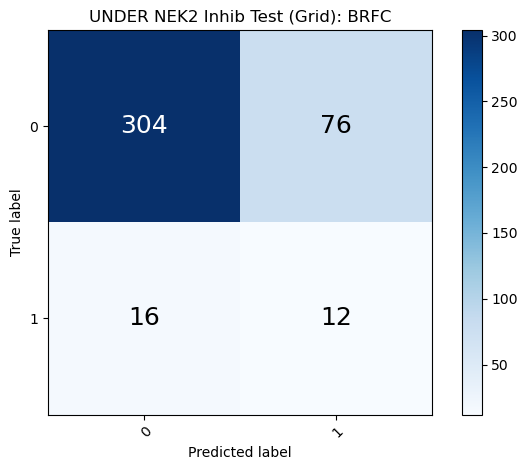

In [14]:
# with open(save_file3, 'wb') as f:
#     pickle.dump(brfc_bestUNDER['best_model'], f)
with open('../saved_models/'+save_file3, 'rb') as f: 
    brfc_bestUNDER = pickle.load(f) 


gridBRFCesults = rf_results2(brfc_bestUNDER, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridBRFCesults['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test (Grid): BRFC')



# Try BRFC with balanced class weight & bootstrap

/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:576: FutureWarning: The default of `sampling_strategy` will change from `'auto'` to `'all'` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `'all'` to silence this warning and adopt the future behaviour.
  warn(
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/imblearn/ensemble/_forest.py:588: FutureWarning: The default of `replacement` will change from `False` to `True` in version 0.13. This change will follow the implementation proposed in the original paper. Set to `True` to silence this warning and adopt the future behaviour.
  warn(


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000, specificity: 1.000
TEST: accuracy: 0.875, precision: 0.317, recall: 0.714, specificity: 0.887


<Figure size 600x400 with 0 Axes>

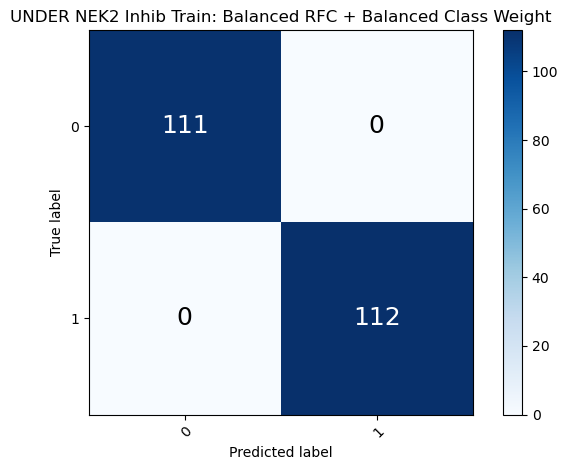

<Figure size 600x400 with 0 Axes>

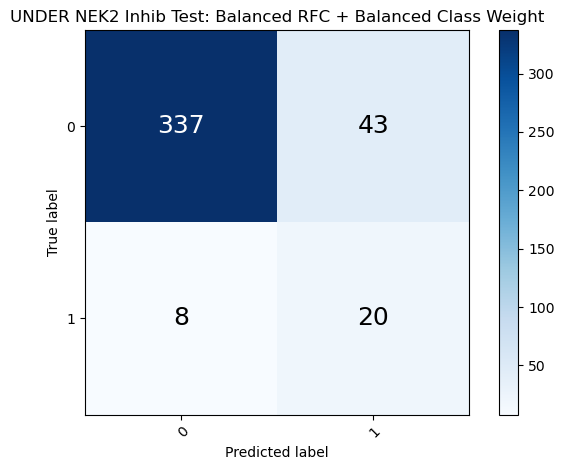

In [15]:
brf_modelCWB_UNDER = rf_models(train_x, train_y, test_x, test_y, 'balanced RF', {'class_weight':'balanced', 'bootstrap':True})
plot_confusion_matrix(train_y,brf_modelCWB_UNDER['train_pred'], ['0','1'], title='UNDER NEK2 Inhib Train: Balanced RFC + Balanced Class Weight')
plot_confusion_matrix(test_y, brf_modelCWB_UNDER['test_pred'], ['0','1'], title='UNDER NEK2 Inhib Test: Balanced RFC + Balanced Class Weight')

In [16]:
save_file4 = 'atom_nek2inhibUNDER_BRFC_BCW_best.pkl'
# brfc_BCW_UNDER_best = find_best_models(train_x, train_y, test_x, test_y, 'balanced RF', {'class_weight':'balanced','bootstrap':True}, param_grid, 2)


TRAIN: accuracy: 1.000, precision: 1.000, recall: 1.000,  specificity: 1.000
TEST: accuracy: 0.735, precision: 0.143, recall: 0.571, specificity: 0.747


<Figure size 600x400 with 0 Axes>

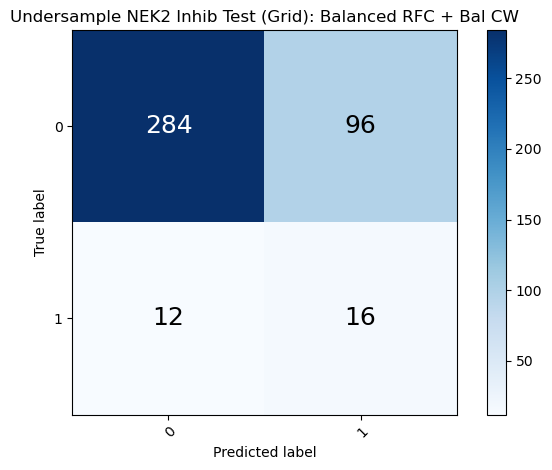

In [17]:
# with open(save_file4, 'wb') as f:
#     pickle.dump(brfc_BCW_UNDER_best['best_model'], f)
with open('../saved_models/'+save_file4, 'rb') as f: 
    brfc_BCW_UNDER_best = pickle.load(f) 

gridBRFC_BCWesults = rf_results2(brfc_BCW_UNDER_best, train_x, train_y, test_x, test_y)
plot_confusion_matrix(test_y, gridBRFC_BCWesults['test_pred'], ['0','1'], title='Undersample NEK2 Inhib Test (Grid): Balanced RFC + Bal CW')



/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 31.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/jayceepang/miniconda3/envs/atom2024/lib/python3.9/site-packages/seaborn/categorical.py:3399: UserWarning: 34.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


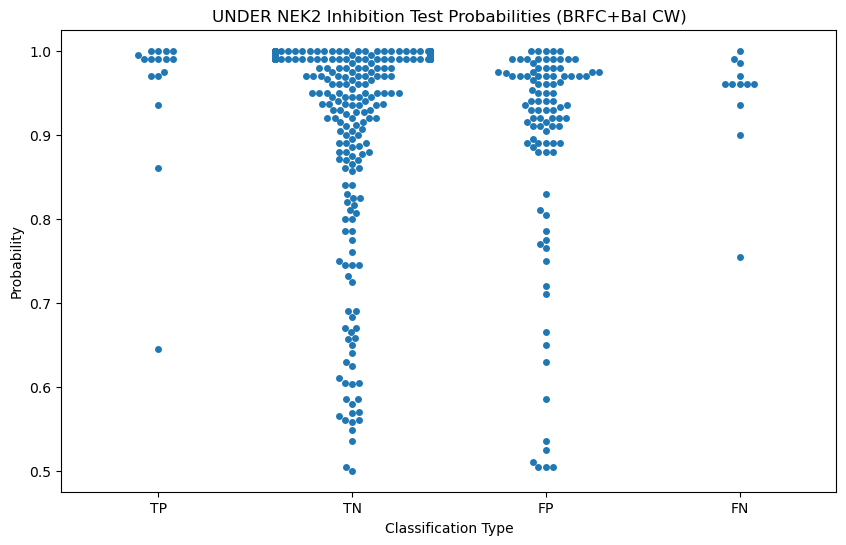

In [19]:
swarm_prob(brfc_BCW_UNDER_best, test_x, test_y, 'UNDER NEK2 Inhibition Test Probabilities (BRFC+Bal CW)')

In [51]:
nek2inhib_UNDERmodels = {'default_RF':rf_basicbestUNDER, 'rf_bcw':rf_basicBCWbestUNDER,
                              'BRFC':brfc_bestUNDER, 'BRFC_bcw':brfc_BCW_UNDER_best}

with open('nek2inhib_UNDERmodels.pkl', 'wb') as f:
    pickle.dump(nek2inhib_UNDERmodels, f)
